In [1]:
#load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics    
from collections import OrderedDict

In [2]:
#reading the dataset into dataframe. 
#The dataset was retrieved from here 
# https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt)

df = pd.read_csv('../input/BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#### <strong>Pre-Processing and Exploratory data analysis:</strong>

###### i. Scatterplots of the independent variables in the dataset.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


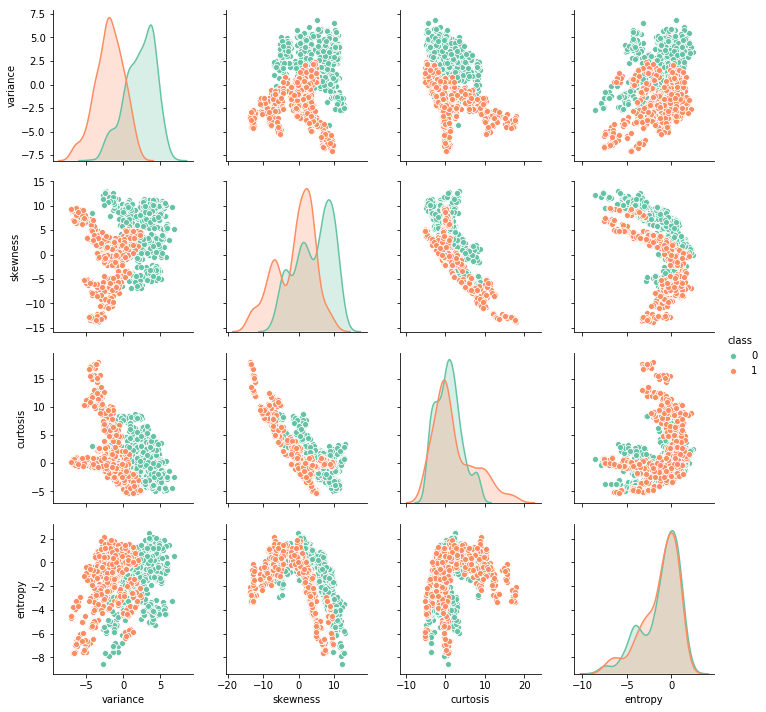

In [3]:
#scatter plot
sns.set
scatter_plot = sns.pairplot(data=df, kind='scatter',  vars = ["variance", "skewness", "curtosis", "entropy"], palette="Set2",hue='class')

###### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

<Figure size 432x288 with 0 Axes>

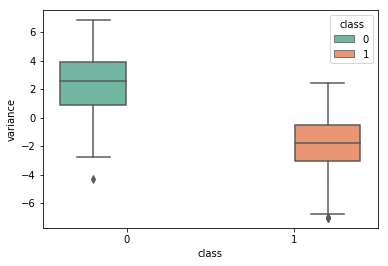

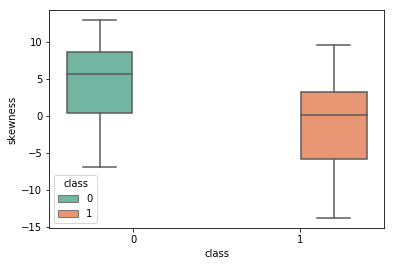

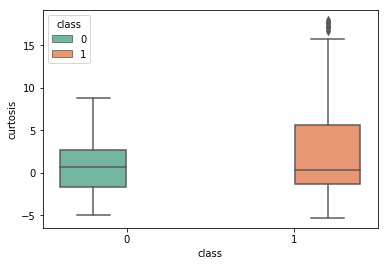

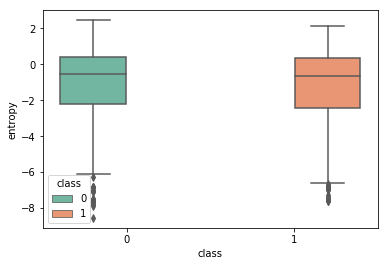

<Figure size 432x288 with 0 Axes>

In [4]:
#boxplot
f1 = sns.boxplot(y="variance", x="class", hue="class", palette="Set2", data = df)
plt.figure()
f2 = sns.boxplot(y="skewness", x="class", hue="class", palette="Set2",  data = df)
plt.figure()
f3 = sns.boxplot(y="curtosis", x="class", hue="class", palette="Set2", data = df)
plt.figure()
f4 = sns.boxplot(y="entropy", x="class", hue="class", palette="Set2", data = df)
plt.figure()

###### iii. Select the first 200 rows of Class 0 and the first 200 rows of Class 1 as the test set and the rest of the data as the training set.

In [5]:
def splitData(df, headSize):
    """
    This function splits the data based on the head size .    
    """
    hd = df.head(headSize)
    tl = df.tail(len(df)-headSize)
    return hd, tl

def getData(a,b):
    """
    This function combines 2 dataframes.     
    """
    x = pd.concat([a, b], sort=False)    
    y = x['class']
    return x,y

data_0 = df.loc[df['class']==0]
test_0, train_0 = splitData(data_0, 200)
data_1 = df.loc[df['class']==1]
test_1, train_1 = splitData(data_1, 200)
X_tr, Y_train = getData(train_0, train_1)
X_test, Y_test = getData(test_0, test_1)

#### <strong>KNN based classification on Banknote authentication Dataset<strong>

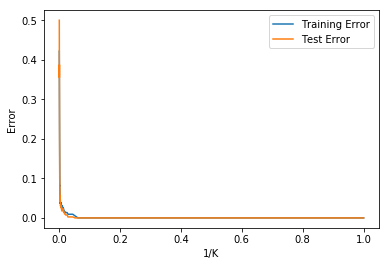

The optimal value of k (highest) is 19


In [6]:
neighbors = list(range(1,901,3))
kinv = []
training_error = []
test_error = []
best_error = 1
X_train = X_tr.drop(columns = ['class'])
X_test = X_test.drop(columns = ['class'])
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(np.array(X_train), np.array(Y_train))
    test_pred = knn.predict(X_test)
    train_pred = knn.predict(X_train)
    tr_error = 1 - metrics.accuracy_score(Y_train, train_pred)
    t_error = 1 - metrics.accuracy_score(Y_test, test_pred)
    training_error.append(tr_error)
    test_error.append(t_error) 
    if t_error <= best_error:
        best_error = t_error
        kstar = k
    kinv.append(1/k)

plt.plot(kinv, training_error, label= 'Training Error')
plt.plot(kinv, test_error, label= 'Test Error')
plt.xlabel('1/K')
plt.ylabel('Error')
plt.legend()
plt.show()
    
print("The optimal value of k (highest) is %d" % kstar)

##### **Confusion matrix,true positive rate, true negative rate, precision, and F-score when k = k*.**

In [7]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(np.array(X_train), np.array(Y_train))
pred = knn.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, pred).ravel()
print("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test, pred))
print("Precision score: %d" % metrics.precision_score(Y_test, pred))
print("F1 score: %d" % metrics.f1_score(Y_test, pred))
print("True positive rate: ", tp/(tp+fn))
print("True negative rate: ", tn/(tn+fp))

Confusion Matrix:
[[200   0]
 [  0 200]]
Precision score: 1
F1 score: 1
True positive rate:  1.0
True negative rate:  1.0


##### <strong>Learning Curve </strong>

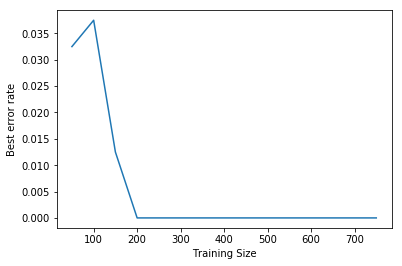

In [8]:
N = list(range(50, 800, 50))
min_test_error = []
for n in range(50, 800, 50):
    
    #split the train data from a(iii) into N/2
    class_train = X_tr.loc[X_tr['class']==0].head(n//2)
    class_test = X_tr.loc[X_tr['class']==1].head(n//2)
    x_train= pd.concat([class_train, class_test], sort=False)    
    y_train = x_train['class']
    x_train = x_train.drop(columns = ['class'])
    
    neighbors = list(range(1,n,40))
    test_scores = []    
    optimal_k = []
    for k in range(1,n,40):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(np.array(x_train), np.array(y_train))
        test_pred = knn.predict(X_test)
        test_scores.append(metrics.accuracy_score(Y_test, test_pred))
    test_error= [1 - t for t in test_scores]
    min_test_error.append(min(test_error))           

plt.plot(N, min_test_error)
plt.xlabel('Training Size')
plt.ylabel('Best error rate')
plt.show()

#### (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k) in a table.

#### (i) <u>Minkowiski</u>

###### (A) Manhattan Distance

In [19]:
neighbors = list(range(1,901,10))  
best_test_error =[]
manhattan_test_error = []
optimal_k = []
best_error = 1
for k in neighbors:
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_manhattan.fit(np.array(X_train), np.array(Y_train))
    manhattan_test_pred = knn_manhattan.predict(X_test)
    mtest_error = 1 - metrics.accuracy_score(Y_test, manhattan_test_pred)
    manhattan_test_error.append(mtest_error)    
    if mtest_error <= best_error:
        best_error = mtest_error
        kstar = k
best_test_error.append(best_error)
optimal_k.append(kstar)
print("The optimal value of k(manhattan) is %d" % kstar)

The optimal value of k(manhattan) is 11


###### (B) logp Minkowiski

In [20]:
def logDist(x, y,**kwargs):
    """
    This function gives a user defined minkowiski distance metric for logp values.    
    """
    p = kwargs["t"]
    return np.sum(abs(np.subtract(x,y))**p)**(1/p)



logminkowiski_test_error= []
best_error = 1
best_logp = 0
for p in np.arange(0.1, 1.1, 0.1):    
    knn_log_minkowiski= KNeighborsClassifier(n_neighbors=11, metric = logDist ,metric_params={'t': 10**p })
    knn_log_minkowiski.fit(np.array(X_train), np.array(Y_train))
    log_minkowiski_test_pred = knn_log_minkowiski.predict(X_test)
    logmtest_error = 1 - metrics.accuracy_score(Y_test, log_minkowiski_test_pred)
    logminkowiski_test_error.append(logmtest_error)
    if logmtest_error <= best_error:
        best_error = logmtest_error
        best_logp = p
       
print("The best log10p: ", best_logp)    

The best log10p:  1.0


###### (C) Chebyshev

In [21]:
best_error = 1
chebyshev_test_error = []
for k in neighbors:
    knn_chebyshev= KNeighborsClassifier(n_neighbors=k, metric ='chebyshev')
    knn_chebyshev.fit(np.array(X_train), np.array(Y_train))
    chebyshev_test_pred = knn_chebyshev.predict(X_test)
    ctest_error = 1 - metrics.accuracy_score(Y_test, chebyshev_test_pred)
    chebyshev_test_error.append(ctest_error)    
    if ctest_error <= best_error:
        best_error = ctest_error
        kstar = k
best_test_error.append(best_error)
optimal_k.append(kstar)

#### (ii) <u>Mahalanobis</u>

In [22]:
mahalanobis_test_error = [] 
best_error = 1
for k in neighbors:    
    knn_mahalanobis= KNeighborsClassifier(n_neighbors=k, metric ='mahalanobis',metric_params={'V': np.cov(X_train.T)})
    knn_mahalanobis.fit(np.array(X_train), np.array(Y_train))
    mahalanobis_test_pred = knn_mahalanobis.predict(X_test)
    mhbtest_error = 1 - metrics.accuracy_score(Y_test, mahalanobis_test_pred)
    mahalanobis_test_error.append(mhbtest_error)  
    if mhbtest_error <= best_error:
        best_error = mhbtest_error
        kstar = k
best_test_error.append(best_error)
optimal_k.append(kstar)

In [23]:
metric = OrderedDict({'Metric': ['Manhattan', 'Chebyshev', 'Mahalanobis'],
         'Optimal_k (Highest)': optimal_k,
         'Best_error': best_test_error})
metric_table = pd.DataFrame.from_dict(metric)
metric_table

,Metric,Optimal_k (Highest),Best_error
0,Manhattan,11,0.0
1,Chebyshev,11,0.0
2,Mahalanobis,11,0.0


#### <strong>Weighted voting with Euclidean, Manhattan, and Chebyshev distances</strong>

In [25]:
neighbors = list(range(1,901,10))
weighted_best_test_error =[]
weighted_optimal_k = []
best_error = 1
for k in neighbors:
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    knn_manhattan.fit(np.array(X_train), np.array(Y_train))
    manhattan_test_pred = knn_manhattan.predict(X_test)
    mtest_error = 1 - metrics.accuracy_score(Y_test, manhattan_test_pred)
    manhattan_test_error.append(mtest_error)    
    if mtest_error <= best_error:
        best_error = mtest_error
        kstar = k
weighted_best_test_error.append(best_error)
weighted_optimal_k.append(kstar)
    
best_error = 1
for k in neighbors:
    knn_chebyshev= KNeighborsClassifier(n_neighbors=k, weights='distance', metric ='chebyshev')
    knn_chebyshev.fit(np.array(X_train), np.array(Y_train))
    chebyshev_test_pred = knn_chebyshev.predict(X_test)
    ctest_error = 1 - metrics.accuracy_score(Y_test, chebyshev_test_pred)
    chebyshev_test_error.append(ctest_error)    
    if ctest_error <= best_error:
        best_error = ctest_error
        kstar = k
weighted_best_test_error.append(best_error)
weighted_optimal_k.append(kstar)

euclidean_test_error = []
best_error = 1
for k in neighbors:
    knn_euclidean= KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_euclidean.fit(np.array(X_train), np.array(Y_train))
    euclidean_test_pred = knn_euclidean.predict(X_test)
    etest_error = 1 - metrics.accuracy_score(Y_test, euclidean_test_pred)
    euclidean_test_error.append(etest_error)
    if etest_error <= best_error:
        best_error = etest_error
        kstar = k
weighted_best_test_error.append(best_error)
weighted_optimal_k.append(kstar)


In [26]:
weighted_metric = OrderedDict({'Metric': ['Manhattan', 'Chebyshev', 'Euclidean'],
         'Optimal_k (highest)': weighted_optimal_k,
         'Best_error': weighted_best_test_error})
weighted_metric_table = pd.DataFrame.from_dict(weighted_metric)
weighted_metric_table

,Metric,Optimal_k (highest),Best_error
0,Manhattan,81,0.0
1,Chebyshev,481,0.0
2,Euclidean,51,0.0


#### Lowest training error rate

In [27]:
print("The lowest training error is %d" % min(training_error))

The lowest training error is 0
